## Copy this notebook (if using Colab) via `File -> Save a Copy in Drive`.

## You can do this assignment outside of Colab (using your local Python installation) via `File -> Download`.

## <u>**Use the "Text" blocks to provide explanations wherever you find them necessary. Highlight your answers inside these text fields to ensure that we don't miss it while grading your HW.**</u>

## *Please answer questions within their designated section and in the order they are asked to maintain clarity and organization. You can add new code and text blocks if you want.*

# Installs 📥

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


# Imports 📂

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


import torch
import torch.nn as nn
import torch
import torchvision.models as models
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

import torchvision
import torchvision.transforms as transforms

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from datasets import load_dataset
from transformers import DistilBertTokenizer, DistilBertModel

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Check if GPU is available 🚀

Use GPU for faster analysis (Google Colab provides access to some free GPUs with time limits)

In [ ]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


# Vision Task [45 Points] 👁️‍🗨️

## Q1: Loading and Splitting CIFAR-10 Dataset (5pts)

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

train_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform
)
test_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform  #10000 images
)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

data_iter = iter(train_loader)
images, labels = next(data_iter)

print("Image batch dimensions:", images.shape)  # Should show [batch_size, 3, 32, 32]
print("Label batch dimensions:", labels.shape)  # Should show [batch_size]
print("Image device:", images.device)  # Device of images

images, labels = images.to(device), labels.to(device)
print("Images and labels moved to:", images.device)  # Should show 'cuda' if GPU is available


Files already downloaded and verified
Files already downloaded and verified
Image batch dimensions: torch.Size([32, 3, 224, 224])
Label batch dimensions: torch.Size([32])
Image device: cpu
Images and labels moved to: cuda:0


## Q2: Feature Extraction with ResNet-18 (5pts)

In [ ]:
resnet18 = models.resnet18(pretrained=True)


resnet18 = torch.nn.Sequential(*(list(resnet18.children())[:-1]))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet18.to(device)

resnet18.eval()

def extract_embeddings(dataloader, model):
    embeddings = []
    labels_list = []

    with torch.no_grad():  # No need to compute gradients for inference
        for images, labels in dataloader:
            images = images.to(device)

            # Forward pass to get embeddings
            features = model(images)

            # Reshape the output to a 2D tensor (batch_size, feature_vector_length)
            features = features.view(features.size(0), -1)

            embeddings.append(features.cpu())  # Move to CPU and store
            labels_list.append(labels.cpu())

    embeddings = torch.cat(embeddings, dim=0)
    labels_list = torch.cat(labels_list, dim=0)

    return embeddings, labels_list

test_embeddings, test_labels = extract_embeddings(test_loader, resnet18)




In [ ]:
print("Test embeddings shape:", test_embeddings.shape)
print("Test labels shape:", test_labels.shape)

Test embeddings shape: torch.Size([10000, 512])
Test labels shape: torch.Size([10000])


## Q3: t-SNE Visualization of ResNet-18 Embeddings (5pts)

In [ ]:
tsne = TSNE(n_components=2,  random_state=42)
embeddings_2d = tsne.fit_transform(test_embeddings) #perplexity=30, learning_rate=200, n_iter=1000,

labels = test_labels.numpy()

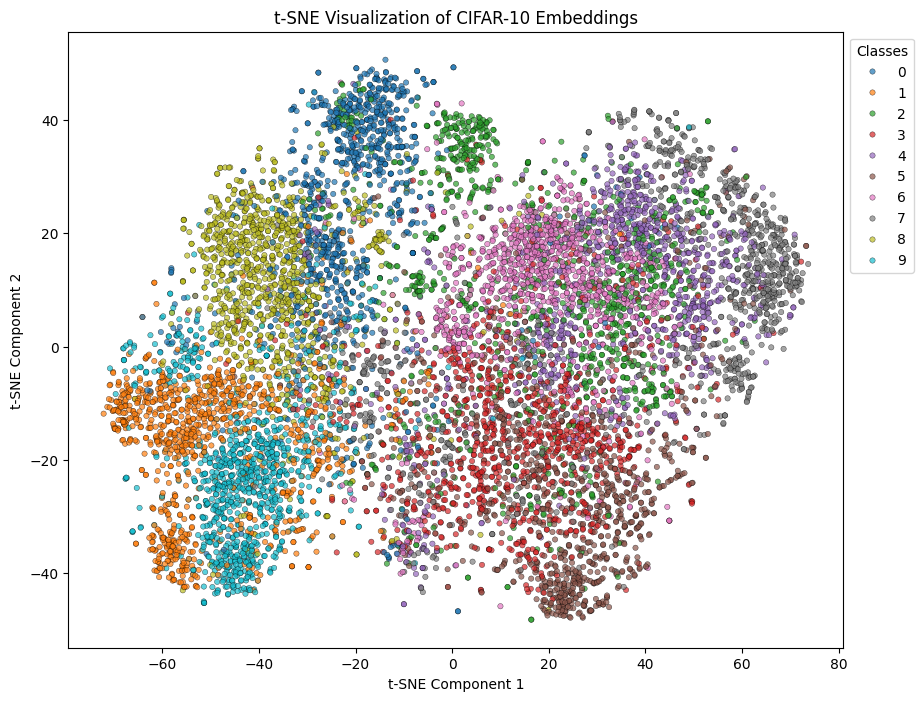

In [ ]:

plt.figure(figsize=(10, 8))
sns.scatterplot(x=embeddings_2d[:, 0], y=embeddings_2d[:, 1], hue=labels, palette="tab10", s=15, alpha=0.7, edgecolor="k")
plt.title("t-SNE Visualization of CIFAR-10 Embeddings")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Classes", loc="best", bbox_to_anchor=(1, 1), ncol=1)
plt.show()

-The above graph represents TSNE Visualization Of CIFAR-10 Visualizations.These are the following i have observed from graph
- Some points are scattered between clusters, which might represent images that the model finds harder to classify because they share features with multiple classes.
- Some clusters, like the purple cluster in the upper-right, appear well-separated, indicating that these classes may be distinct in visual features.
-Overall, though the clusters overlap we can identify points which are clustered together indicating images with similar properties

## Q4: Nearest neighbor classification (10pts)


### Part A - Confusion Matrix and Evaluation (5pts)

In [ ]:
def compute_centroids(embeddings, labels, num_classes=10):
    centroids = []
    for i in range(num_classes):
        class_embeddings = embeddings[labels == i]
        centroid = class_embeddings.mean(dim=0)
        centroids.append(centroid)
    return torch.stack(centroids)

train_embeddings, train_labels = extract_embeddings(train_loader, resnet18)  # Ensure resnet18 is on the correct device
centroids = compute_centroids(train_embeddings, train_labels)


def nearest_neighbor_classification(test_embeddings, centroids, metric="euclidean"):
    predictions = []
    for embedding in test_embeddings:
        if metric == "euclidean":
            # Calculate Euclidean distance
            distances = torch.norm(centroids - embedding, dim=1)
            predicted_class = torch.argmin(distances).item()
        elif metric == "cosine":
            cosine_similarities = torch.nn.functional.cosine_similarity(embedding.unsqueeze(0), centroids)
            predicted_class = torch.argmax(cosine_similarities).item()
        predictions.append(predicted_class)
    return np.array(predictions)

test_predictions_euclidean = nearest_neighbor_classification(test_embeddings, centroids, metric="euclidean")
test_predictions_cosine = nearest_neighbor_classification(test_embeddings, centroids, metric="cosine")


test_labels_np = test_labels.numpy()


def plot_confusion_matrix(true_labels, predicted_labels, title):
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=range(10), yticklabels=range(10))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

    accuracy = accuracy_score(true_labels, predicted_labels)
    print(f"{title} Accuracy: {accuracy * 100:.2f}%")







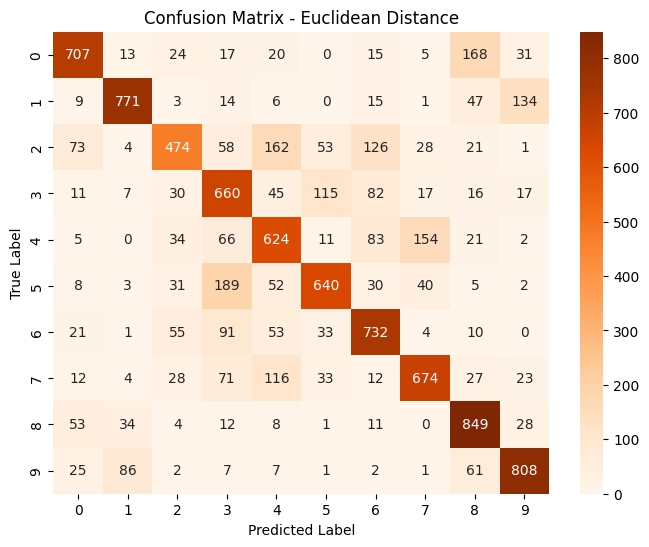

Confusion Matrix - Euclidean Distance Accuracy: 69.39%


In [ ]:
# Confusion matrix for Euclidean distance
plot_confusion_matrix(test_labels_np, test_predictions_euclidean, title="Confusion Matrix - Euclidean Distance")

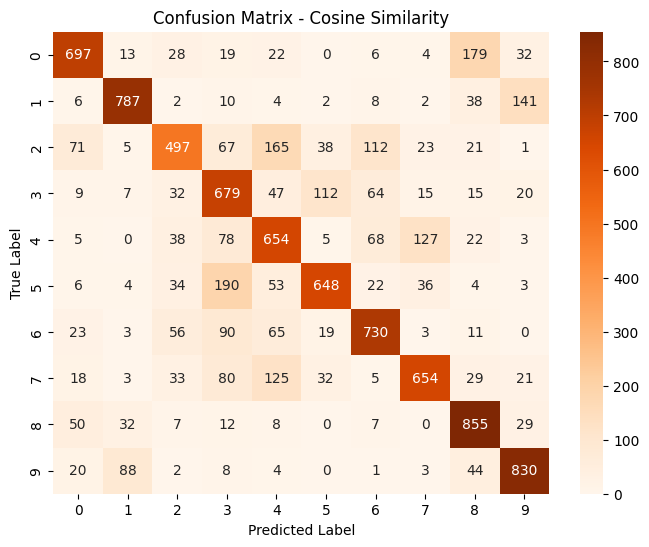

Confusion Matrix - Cosine Similarity Accuracy: 70.31%


In [ ]:
# Confusion matrix for Cosine similarity
plot_confusion_matrix(test_labels_np, test_predictions_cosine, title="Confusion Matrix - Cosine Similarity")

- I have observed that the nearest neighbors classification is good enough in identifying to which class a image belongs and also noticed that cosine similarity fits well though it has similar patterns of mis-identfying images as the euclidian did.

### Part B - Outlier Detection and Analysis (5pts)

In [ ]:
def find_class_outliers(embeddings, labels, centroids, metric="euclidean"):
    outliers = []
    for class_id in range(10):  # Loop through each class
        class_embeddings = embeddings[labels == class_id]

        if metric == "euclidean":
            distances = torch.norm(class_embeddings - centroids[class_id], dim=1)
        elif metric == "cosine":
            distances = -torch.nn.functional.cosine_similarity(class_embeddings, centroids[class_id].unsqueeze(0))

        max_distance_idx = torch.argmax(distances).item()
        outlier_embedding = class_embeddings[max_distance_idx]
        outliers.append((class_id, max_distance_idx, distances[max_distance_idx].item()))

    return outliers

outliers = find_class_outliers(train_embeddings, train_labels, centroids, metric="euclidean")




In [ ]:
def check_outlier_label(outliers, embeddings, centroids):
    mislabeled = []
    for class_id, idx, distance in outliers:
        outlier_embedding = embeddings[train_labels == class_id][idx]
        distances_to_centroids = torch.norm(centroids - outlier_embedding, dim=1)
        closest_centroid_id = torch.argmin(distances_to_centroids).item()
        if closest_centroid_id != class_id:
            mislabeled.append((class_id, idx, closest_centroid_id, distance))

    return mislabeled

mislabeled_outliers = check_outlier_label(outliers, train_embeddings, centroids)

for class_id, idx, closest_class, distance in mislabeled_outliers:
    print(f"Class {class_id} outlier (index {idx}) is closest to centroid of Class {closest_class} with distance {distance:.2f}.")

Class 2 outlier (index 1502) is closest to centroid of Class 5 with distance 23.02.
Class 4 outlier (index 406) is closest to centroid of Class 7 with distance 24.11.
Class 6 outlier (index 229) is closest to centroid of Class 3 with distance 22.58.
Class 7 outlier (index 762) is closest to centroid of Class 2 with distance 22.42.
Class 9 outlier (index 1444) is closest to centroid of Class 0 with distance 21.82.


When Outliers are extracted and observed from the dataset i found that these are the mislabeled images and they are having featues closed to the another class where they are mis interpreted.

## Q5: Building an Image Classification Model (10pts)

### Part A - Confusion Matrix and Evaluation (5pts)

In [ ]:
train_embeddings_np = train_embeddings.numpy()
train_labels_np = train_labels.numpy()
test_embeddings_np = test_embeddings.numpy()
test_labels_np = test_labels.numpy()

# Logistic Regression
logistic_clf = LogisticRegression(max_iter=1000)
logistic_clf.fit(train_embeddings_np, train_labels_np)

# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(train_embeddings_np, train_labels_np)

# Logistic Regression predictions
logistic_preds = logistic_clf.predict(test_embeddings_np)
logistic_accuracy = accuracy_score(test_labels_np, logistic_preds)
print("Logistic Regression Accuracy:", logistic_accuracy)
print(classification_report(test_labels_np, logistic_preds))

# Random Forest predictions
rf_preds = rf_clf.predict(test_embeddings_np)
rf_accuracy = accuracy_score(test_labels_np, rf_preds)
print("Random Forest Accuracy:", rf_accuracy)
print(classification_report(test_labels_np, rf_preds))

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()




Logistic Regression Accuracy: 0.8425
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1000
           1       0.91      0.91      0.91      1000
           2       0.79      0.76      0.78      1000
           3       0.74      0.72      0.73      1000
           4       0.78      0.82      0.80      1000
           5       0.80      0.78      0.79      1000
           6       0.86      0.89      0.87      1000
           7       0.87      0.85      0.86      1000
           8       0.91      0.91      0.91      1000
           9       0.91      0.91      0.91      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

Random Forest Accuracy: 0.7769
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1000
           1       0.86      0.86      0.86      1000
          

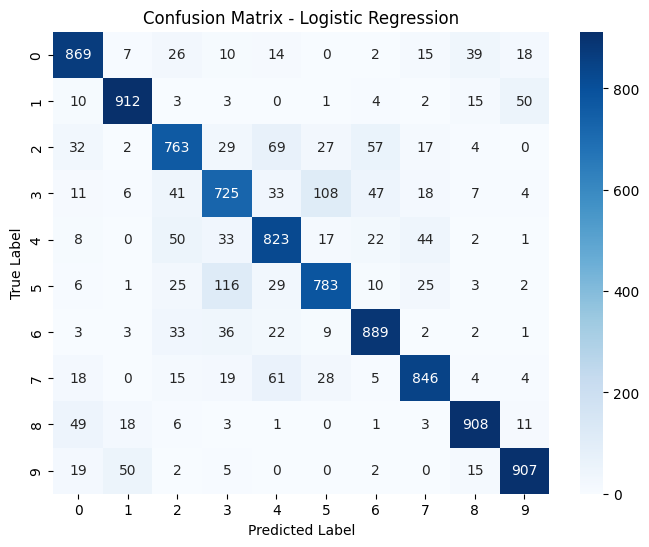

In [ ]:
plot_confusion_matrix(test_labels_np, logistic_preds, title="Confusion Matrix - Logistic Regression")

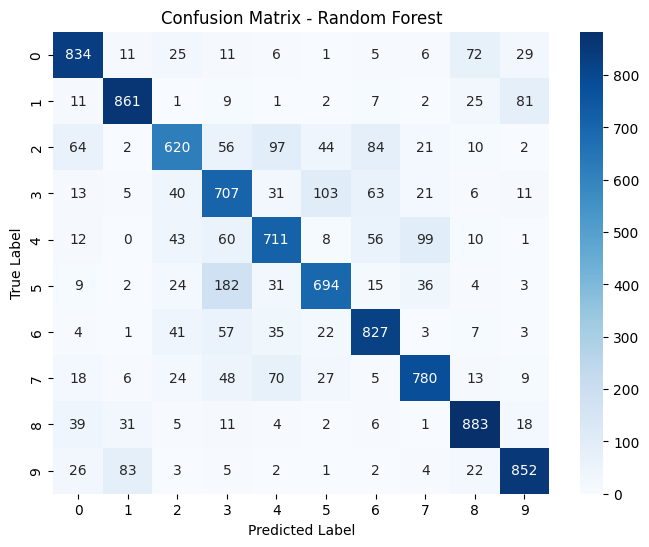

In [ ]:
plot_confusion_matrix(test_labels_np, rf_preds, title="Confusion Matrix - Random Forest")

### Part B - Comparison Between Your Model and Nearest Neighbor Classification (5pts)

- Taking the best models for comparision i.e,(Logistic Regression and Nearest Neighbours Cosine Similarity the rate of accuracy has slight improvement when used Logistic regression. Because of model understing images better.
-if we see the confusion matrix of both classification models we can clearly see that model reduced predicting false classes example 4th and 2nd class. which is proof of improvement
- Class 3 and Class 5 show significant decrease off-diagonal counts when compared, however both models struggles to classify them indicating that the class 3 and 5 have identical features.

## Q6: Dimension Reduction (10pts)

In [ ]:
from sklearn.decomposition import TruncatedSVD

# Apply SVD to reduce embeddings to 10 and 50 dimensions
svd_10 = TruncatedSVD(n_components=10, random_state=42)
svd_50 = TruncatedSVD(n_components=50, random_state=42)

# Fit SVD on training embeddings and transform both training and testing sets
train_embeddings_10 = svd_10.fit_transform(train_embeddings_np)
test_embeddings_10 = svd_10.transform(test_embeddings_np)

train_embeddings_50 = svd_50.fit_transform(train_embeddings_np)
test_embeddings_50 = svd_50.transform(test_embeddings_np)


NameError: name 'train_embeddings_np' is not defined

In [ ]:
# Function to train and evaluate logistic regression on given embeddings
def train_and_evaluate_logistic_regression(train_data, test_data, train_labels, test_labels, dimensions):
    logistic_clf = LogisticRegression(max_iter=1000)
    logistic_clf.fit(train_data, train_labels)
    preds = logistic_clf.predict(test_data)

    # Calculate accuracy
    accuracy = accuracy_score(test_labels, preds)
    print(f"Logistic Regression Accuracy with {dimensions} Dimensions: {accuracy * 100:.2f}%")
    print(classification_report(test_labels, preds))

    # Confusion matrix
    cm = confusion_matrix(test_labels, preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - Logistic Regression with {dimensions} Dimensions")
    plt.show()




Logistic Regression Accuracy with 10 Dimensions: 66.55%
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1000
           1       0.76      0.74      0.75      1000
           2       0.57      0.50      0.53      1000
           3       0.51      0.53      0.52      1000
           4       0.62      0.59      0.61      1000
           5       0.63      0.62      0.62      1000
           6       0.69      0.76      0.73      1000
           7       0.66      0.65      0.66      1000
           8       0.74      0.80      0.77      1000
           9       0.71      0.74      0.73      1000

    accuracy                           0.67     10000
   macro avg       0.66      0.67      0.66     10000
weighted avg       0.66      0.67      0.66     10000



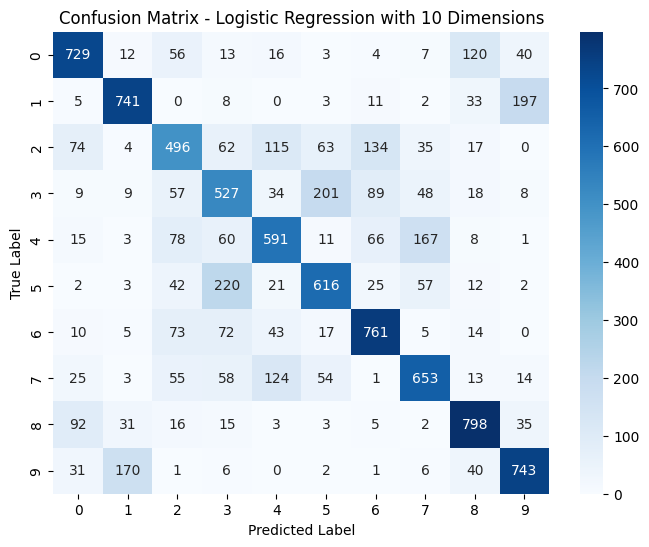

In [ ]:
train_and_evaluate_logistic_regression(train_embeddings_10, test_embeddings_10, train_labels_np, test_labels_np, dimensions=10)

Logistic Regression Accuracy with 50 Dimensions: 80.09%
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1000
           1       0.87      0.87      0.87      1000
           2       0.74      0.69      0.71      1000
           3       0.68      0.70      0.69      1000
           4       0.75      0.77      0.76      1000
           5       0.78      0.73      0.76      1000
           6       0.81      0.87      0.84      1000
           7       0.83      0.82      0.82      1000
           8       0.84      0.87      0.86      1000
           9       0.87      0.86      0.87      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



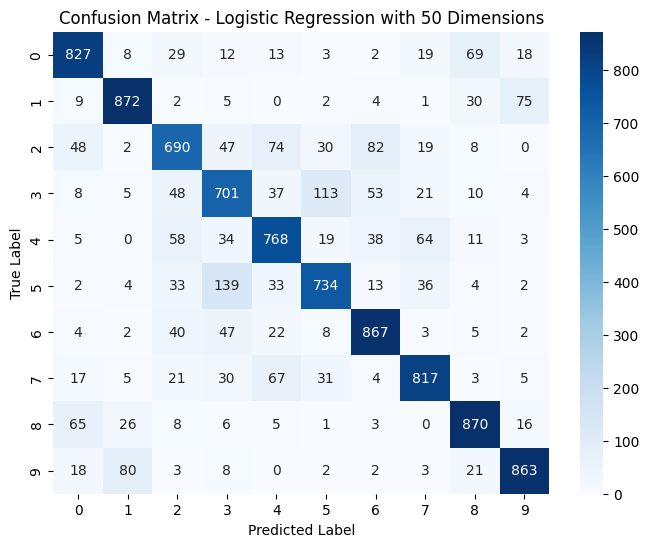

In [ ]:
train_and_evaluate_logistic_regression(train_embeddings_50, test_embeddings_50, train_labels_np, test_labels_np, dimensions=50)

- When reducing the embeddings to 50 dimensions, the model’s performance was largely unaffected. The confusion matrix showed very similar patterns to the original high-dimensional embeddings, indicating that the model could still distinguish between most classes effectively.
- This suggests that the most important features required for classification were preserved in the 50-dimensional space. In other words, the model retained enough discriminative information about each class even with reduced dimensions.

- However, when reducing down to 10 dimensions, the model's performance declined. The confusion matrix showed an increase in off-diagonal values, indicating more frequent misclassifications across several classes.
- This decline in performance suggests that important features were lost during the reduction to 10 dimensions. With fewer dimensions, the embeddings couldn’t capture the subtle distinctions between some classes, leading to confusion between similar-looking classes.

# NLP Task [45 Points] 📝

## Q7.1: Loading and Splitting AGS News Dataset (5pts)

In [ ]:
from datasets import load_dataset

# Load the AG News dataset
dataset = load_dataset("ag_news")
train_dataset = dataset['train']
test_dataset = dataset['test']


README.md:   0%|          | 0.00/8.07k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/18.6M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/1.23M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

In [ ]:
import numpy as np

def stratified_sample(dataset, sample_size):
    labels_np = np.array(dataset['label'])  # Convert labels to numpy array for easier handling
    num_classes = len(np.unique(labels_np))  # Number of classes (4 for AG News)
    per_class_sample_size = sample_size // num_classes  # Equal samples per class

    sampled_indices = []

    # Loop through each class and sample `per_class_sample_size` examples
    for label in range(num_classes):
        # Get all indices for the current class
        class_indices = np.where(labels_np == label)[0]

        # Randomly sample indices for this class
        class_sample_indices = np.random.choice(class_indices, per_class_sample_size, replace=False)

        # Append the sampled indices to the overall list
        sampled_indices.extend(class_sample_indices)

    # Select the sampled subset
    sampled_dataset = dataset.select(sampled_indices)

    return sampled_dataset


In [ ]:
# Define the sample size for each subset (1000 samples per split)
sample_size = 6000

# Perform stratified sampling
train_sampled = stratified_sample(train_dataset, sample_size)
test_sampled = stratified_sample(test_dataset, sample_size)

from collections import Counter

# Verify the sampled sizes and class distribution using Counter
print(f"Sampled training set size: {len(train_sampled)}")
print("Class distribution in the sampled training set:")
print(Counter(train_sampled['label']))

print(f"\nSampled testing set size: {len(test_sampled)}")
print("Class distribution in the sampled testing set:")
print(Counter(test_sampled['label']))



Sampled training set size: 6000
Class distribution in the sampled training set:
Counter({0: 1500, 1: 1500, 2: 1500, 3: 1500})

Sampled testing set size: 6000
Class distribution in the sampled testing set:
Counter({0: 1500, 1: 1500, 2: 1500, 3: 1500})


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Ensure stopwords are downloaded
nltk.download('stopwords')

def clean_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove URLs and email addresses
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'\S+@\S+', '', text)

    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Remove extra whitespace
    text = " ".join(text.split())

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    text = " ".join([word for word in text.split() if word not in stop_words])

    # Apply stemming
    stemmer = PorterStemmer()
    text = " ".join([stemmer.stem(word) for word in text.split()])

    return text


# Clean the sampled training and testing sets
train_sampled = [{"text": clean_text(text), "label": label} for text, label in zip(train_sampled['text'], train_sampled['label'])]
test_sampled = [{"text": clean_text(text), "label": label} for text, label in zip(test_sampled['text'], test_sampled['label'])]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Q7.2: Feature Extraction with DistilBERT (5pts)

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load the DistilBERT model and tokenizer
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Move model to the device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()  # Set the model to evaluation mode


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): MultiHeadSelfAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Li

In [ ]:
def extract_embeddings(dataset, tokenizer, model, batch_size=32):
    embeddings = []
    labels = []

    for i in range(0, len(dataset), batch_size):
        # Batch the text and labels
        batch = dataset[i:i + batch_size]
        texts = [item['text'] for item in batch]  # Extract 'text' from each dictionary in the batch
        label_batch = [item['label'] for item in batch]  # Extract 'label' from each dictionary in the batch

        # Tokenize the text
        inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True, max_length=512)
        inputs = {key: value.to(device) for key, value in inputs.items()}

        # Forward pass to get embeddings
        with torch.no_grad():
            outputs = model(**inputs)

        # Use mean pooling on the last hidden state
        last_hidden_state = outputs.last_hidden_state
        batch_embeddings = last_hidden_state.mean(dim=1).cpu()

        embeddings.append(batch_embeddings)
        labels.extend(label_batch)

    embeddings = torch.cat(embeddings, dim=0)
    labels = torch.tensor(labels)
    return embeddings, labels


In [ ]:
# Extract embeddings for the test set
test_embeddings, test_labels = extract_embeddings(test_sampled, tokenizer, model)

# Display the shape of the extracted embeddings
print(f"Test embeddings shape: {test_embeddings.shape}")  # Expected shape: (number of samples, embedding size)


Test embeddings shape: torch.Size([6000, 768])


## Q7.3: t-SNE Visualization of DistilBERT Embeddings (5pts)

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Convert embeddings to numpy for t-SNE
test_embeddings_np = test_embeddings.numpy()  # Assuming 'test_embeddings' is a tensor
test_labels_np = test_labels.numpy()          # Assuming 'test_labels' is a tensor

# Apply t-SNE to reduce 768-dimensional embeddings to 2D
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(test_embeddings_np)



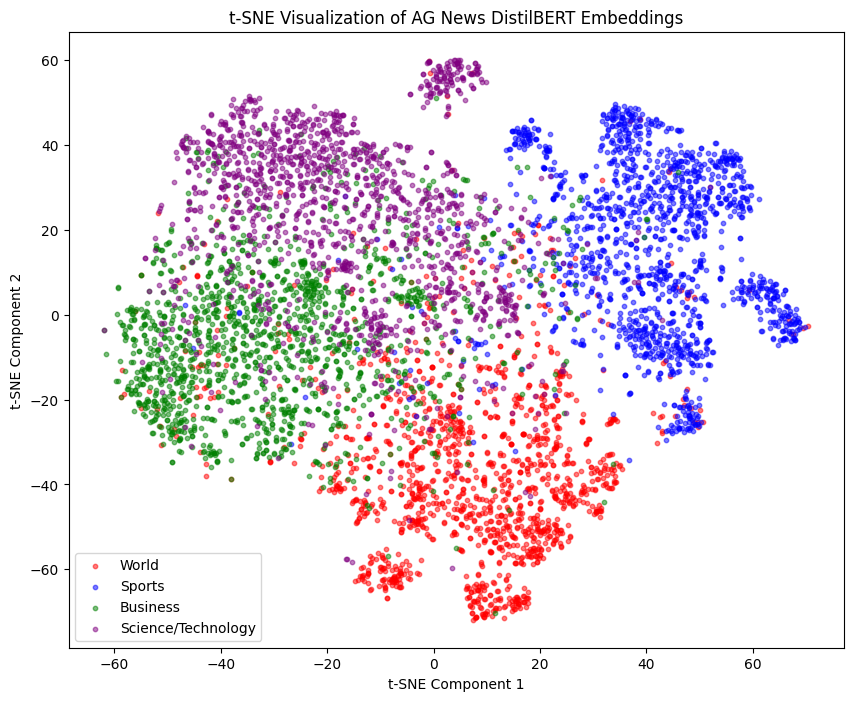

In [ ]:
# Define class names and colors for visualization
class_names = ['World', 'Sports', 'Business', 'Science/Technology']
colors = ['red', 'blue', 'green', 'purple']

plt.figure(figsize=(10, 8))

# Plot each class with a different color
for label, color in zip(range(len(class_names)), colors):
    idx = test_labels_np == label
    plt.scatter(embeddings_2d[idx, 0], embeddings_2d[idx, 1], c=color, label=class_names[label], alpha=0.5, s=10)

# Set plot labels and legend
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.title("t-SNE Visualization of AG News DistilBERT Embeddings")
plt.show()


- Each class is fairly well-separated, which indicates that the embeddings capture meaningful features that differentiate these categories.
- The overlap between World and Business could imply that the model sometimes finds it challenging to separate content related to global business
-The Science/Technology (purple) cluster is mostly distinct but has a few points near the World and Business clusters. This makes sense as certain technological advancements or scientific discoveries might also be relevant to world news

## Q7.4: Nearest neighbor classification (10pts)

### Part A - Confusion Matrix and Evaluation (5pts)

In [ ]:
import torch

def compute_centroids(embeddings, labels, num_classes=4):
    centroids = []
    for class_id in range(num_classes):
        class_embeddings = embeddings[labels == class_id]
        centroid = class_embeddings.mean(dim=0)  # Calculate the mean embedding for the class
        centroids.append(centroid)
    return torch.stack(centroids)


In [ ]:
num_classes = 4  # AG News has 4 classes
train_embeddings, train_labels = extract_embeddings(train_sampled, tokenizer, model)
centroids = compute_centroids(train_embeddings, train_labels, num_classes)


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

def nearest_neighbor_classification(test_embeddings, centroids, metric="euclidean"):
    predictions = []
    for embedding in test_embeddings:
        if metric == "euclidean":
            # Calculate Euclidean distance to each centroid
            distances = torch.norm(centroids - embedding, dim=1)
            predicted_class = torch.argmin(distances).item()
        elif metric == "cosine":
            # Calculate cosine similarity to each centroid
            cosine_similarities = torch.nn.functional.cosine_similarity(embedding.unsqueeze(0), centroids)
            predicted_class = torch.argmax(cosine_similarities).item()
        predictions.append(predicted_class)
    return np.array(predictions)

test_embeddings, test_labels = extract_embeddings(test_sampled, tokenizer, model)

test_predictions_euclidean = nearest_neighbor_classification(test_embeddings, centroids, metric="euclidean")

test_predictions_cosine = nearest_neighbor_classification(test_embeddings, centroids, metric="cosine")


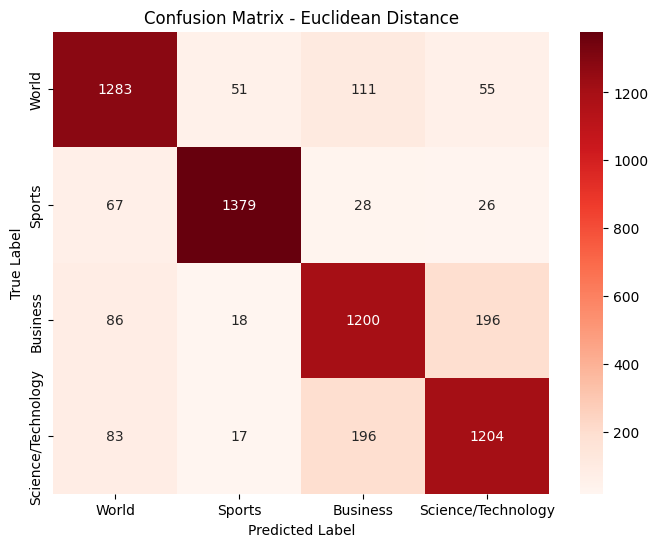

Confusion Matrix - Euclidean Distance Accuracy: 84.43%


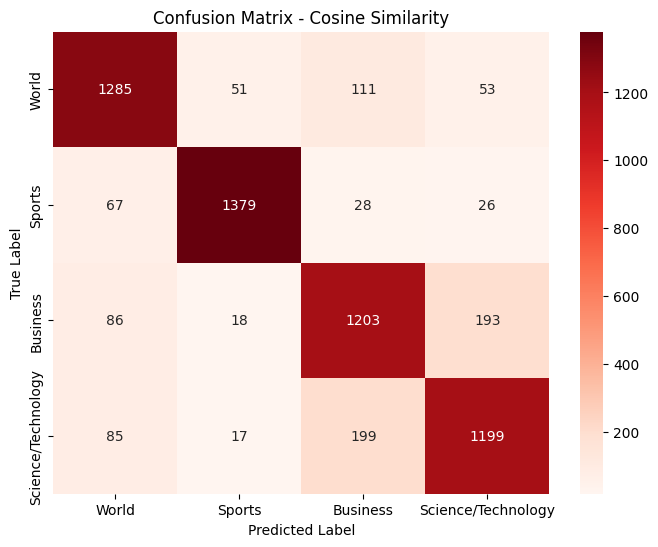

Confusion Matrix - Cosine Similarity Accuracy: 84.43%


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(true_labels, predicted_labels, title):
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

    accuracy = accuracy_score(true_labels, predicted_labels)
    print(f"{title} Accuracy: {accuracy * 100:.2f}%")

class_names = ['World', 'Sports', 'Business', 'Science/Technology']

plot_confusion_matrix(test_labels.numpy(), test_predictions_euclidean, "Confusion Matrix - Euclidean Distance")

plot_confusion_matrix(test_labels.numpy(), test_predictions_cosine, "Confusion Matrix - Cosine Similarity")


- The nearest neighbor classification using these distance metrics performs well overall, with some challenges in differentiating closely related classes.
-The overlap in misclassifications between Business and Science/Technology indicates that certain articles in these categories may share vocabulary or topics that make them challenging to distinguish, even in embedding space.
-Furthermore,The results for Euclidean distance and Cosine similarity are very similar, with only minor differences in the number of misclassifications.

### Part B - Outlier Detection and Analysis (5pts)

In [ ]:
def find_class_outliers(embeddings, labels, centroids, metric="euclidean"):
    outliers = []
    for class_id in range(len(centroids)):  # Loop through each class
        # Get embeddings for the current class
        class_embeddings = embeddings[labels == class_id]

        # Calculate distances from each image to the class centroid
        if metric == "euclidean":
            distances = torch.norm(class_embeddings - centroids[class_id], dim=1)
        elif metric == "cosine":
            distances = -torch.nn.functional.cosine_similarity(class_embeddings, centroids[class_id].unsqueeze(0))

        # Identify the index of the image with the maximum distance (furthest from centroid)
        max_distance_idx = torch.argmax(distances).item()
        outlier_embedding = class_embeddings[max_distance_idx]

        # Store the class ID, index of the outlier, and its distance from the centroid
        outliers.append((class_id, max_distance_idx, outlier_embedding, distances[max_distance_idx].item()))

    return outliers


In [ ]:
outliers = find_class_outliers(train_embeddings, train_labels, centroids, metric="euclidean")


In [ ]:
def check_outlier_mislabeling(outliers, centroids):
    mislabeled = []
    for class_id, idx, outlier_embedding, distance in outliers:
        distances_to_centroids = torch.norm(centroids - outlier_embedding, dim=1)

        # Identify the closest centroid
        closest_centroid_id = torch.argmin(distances_to_centroids).item()

        if closest_centroid_id != class_id:
            mislabeled.append((class_id, idx, closest_centroid_id, distance))

    return mislabeled

mislabeled_outliers = check_outlier_mislabeling(outliers, centroids)

for class_id, idx, closest_class, distance in mislabeled_outliers:
    print(f"Class {class_id} outlier (index {idx}) is closer to centroid of Class {closest_class} with distance {distance:.2f}")


Class 0 outlier (index 339) is closer to centroid of Class 1 with distance 5.27


- I found an outlier the reason i think this could be because of a potential labeling error in the dataset or This could mean that it contains features that make it look or seem more like a sample from Class 1 than from Class 0.

## Q7.5: Building a Text Classification Model (10pts)

### Part A - Confusion Matrix and Evaluation (5pts)

In [ ]:
train_embeddings_np = train_embeddings.numpy()  # Assuming 'train_embeddings' is a tensor
train_labels_np = train_labels.numpy()          # Assuming 'train_labels' is a tensor
test_embeddings_np = test_embeddings.numpy()
test_labels_np = test_labels.numpy()

clf = LogisticRegression(max_iter=1000, random_state=42)  # Increase max_iter if convergence warning appears

clf.fit(train_embeddings_np, train_labels_np)


LogisticRegression(max_iter=1000, random_state=42)

Logistic Regression Accuracy: 87.62%


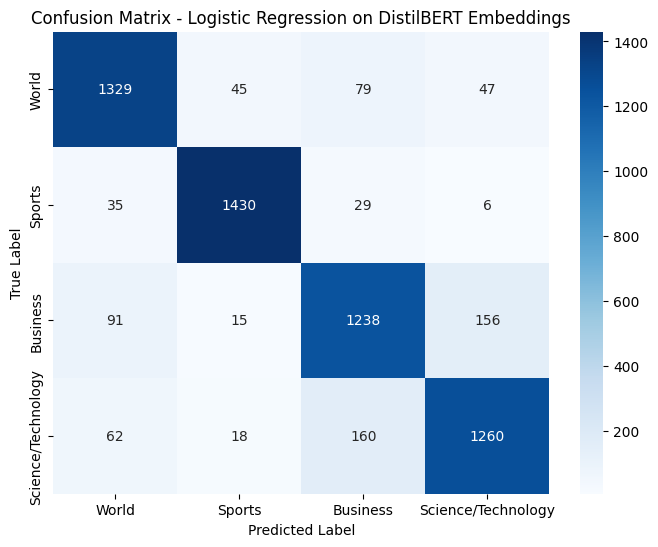

In [ ]:
test_predictions = clf.predict(test_embeddings_np)

cm = confusion_matrix(test_labels_np, test_predictions)
accuracy = accuracy_score(test_labels_np, test_predictions)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")

class_names = ['World', 'Sports', 'Business', 'Science/Technology']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression on DistilBERT Embeddings")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust n_estimators as needed

rf_clf.fit(train_embeddings_np, train_labels_np)


RandomForestClassifier(random_state=42)

Random Forest Accuracy: 85.87%


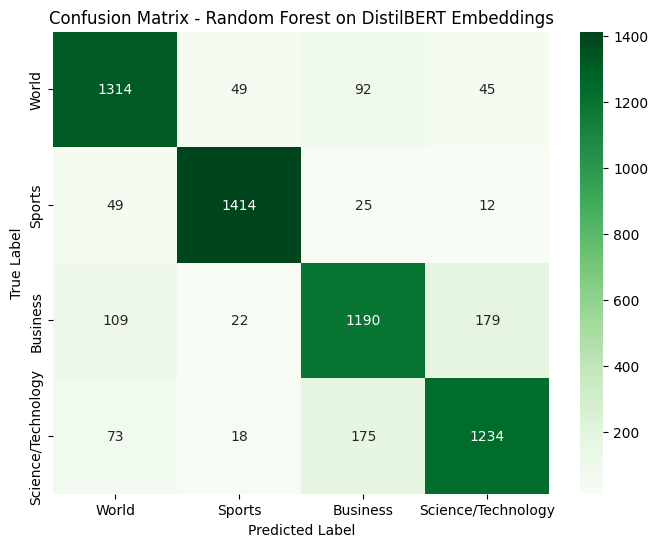

In [ ]:
rf_test_predictions = rf_clf.predict(test_embeddings_np)

rf_cm = confusion_matrix(test_labels_np, rf_test_predictions)
rf_accuracy = accuracy_score(test_labels_np, rf_test_predictions)
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")

plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest on DistilBERT Embeddings")
plt.show()


### Part B - Comparison Between Your Model and Nearest Neighbor Classification (5pts)

- Logistic Regressionhas higher correct classification rates and fewer misclassifications, especially in the challenging pairs of classes like World vs. Business and Business vs. Science/Technology.
- Logistic regression leverages the learned embeddings from DistilBERT more effectively, capturing complex relationships between features that nearest-neighbor methods might overlook.
- While effective to some extent, nearest-neighbor classification falls short in distinguishing classes with similar vocabulary or themes (e.g., Business and Science/Technology).
- Nearest-neighbor works well for more distinct classes, such as Sports, but it lacks the ability to adapt to complex decision boundaries that logistic regression can handle with the DistilBERT embeddings.
- Logistic Regression outperforms nearest-neighbor classification on this task.

## Q7.6: Dimension Reduction (10pts)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Define PCA transformations for 10 and 50 dimensions
pca_10 = PCA(n_components=10, random_state=42)
pca_50 = PCA(n_components=50, random_state=42)

# Fit and transform the training embeddings
train_embeddings_10d = pca_10.fit_transform(train_embeddings_np)
train_embeddings_50d = pca_50.fit_transform(train_embeddings_np)

# Apply the same transformations to the test embeddings
test_embeddings_10d = pca_10.transform(test_embeddings_np)
test_embeddings_50d = pca_50.transform(test_embeddings_np)


In [ ]:
# Random Forest on 10D embeddings
rf_clf_10d = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf_10d.fit(train_embeddings_10d, train_labels_np)
rf_test_predictions_10d = rf_clf_10d.predict(test_embeddings_10d)
rf_accuracy_10d = accuracy_score(test_labels_np, rf_test_predictions_10d)
print(f"Random Forest Accuracy with 10D PCA: {rf_accuracy_10d * 100:.2f}%")

# Random Forest on 50D embeddings
rf_clf_50d = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf_50d.fit(train_embeddings_50d, train_labels_np)
rf_test_predictions_50d = rf_clf_50d.predict(test_embeddings_50d)
rf_accuracy_50d = accuracy_score(test_labels_np, rf_test_predictions_50d)
print(f"Random Forest Accuracy with 50D PCA: {rf_accuracy_50d * 100:.2f}%")


Random Forest Accuracy with 10D PCA: 84.10%
Random Forest Accuracy with 50D PCA: 84.82%


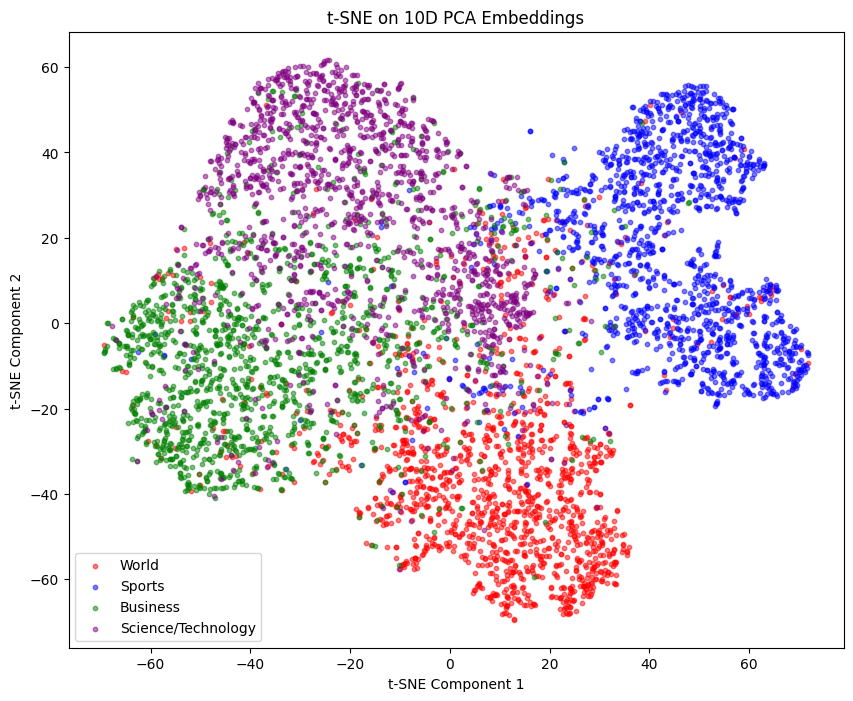

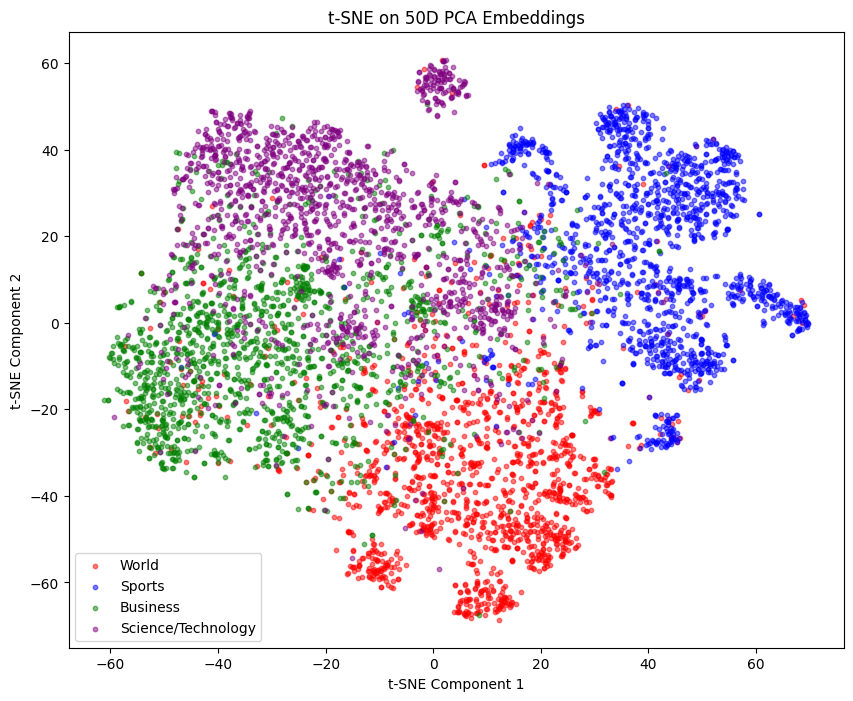

In [ ]:
from sklearn.manifold import TSNE

# Apply t-SNE on 10D embeddings
tsne_10d = TSNE(n_components=2, random_state=42)
embeddings_2d_10d = tsne_10d.fit_transform(test_embeddings_10d)

# Apply t-SNE on 50D embeddings
tsne_50d = TSNE(n_components=2, random_state=42)
embeddings_2d_50d = tsne_50d.fit_transform(test_embeddings_50d)

# Plotting function
def plot_tsne(embeddings_2d, labels, title):
    plt.figure(figsize=(10, 8))
    for label, color in zip(range(len(class_names)), ['red', 'blue', 'green', 'purple']):
        idx = labels == label
        plt.scatter(embeddings_2d[idx, 0], embeddings_2d[idx, 1], c=color, label=class_names[label], alpha=0.5, s=10)
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.legend()
    plt.title(title)
    plt.show()

# Plot t-SNE results for 10D and 50D embeddings
plot_tsne(embeddings_2d_10d, test_labels_np, "t-SNE on 10D PCA Embeddings")
plot_tsne(embeddings_2d_50d, test_labels_np, "t-SNE on 50D PCA Embeddings")


**50D Reduction** Reducing the dimensionality to 50D preserves most of the essential structure and separability of the embeddings. This dimensionality is likely sufficient for retaining meaningful features that DistilBERT extracted. Thus, the classifier’s performance is expected to be similar to the original, high-dimensional embeddings, with minimal loss of accuracy.  
**10D Reduction** Reducing to 10 dimensions leads to more overlap between clusters. Important features are likely lost, which might reduce the model’s ability to separate closely related classes effectively. This could lead to slightly lower performance, especially between classes with thematic overlaps, like Business and Science/Technology.



# Q8: Letting AI Do Your Homework  [10 Points] 🤖/👤




### Part A

Evaluate the usefulness of your code-generation system on this assignment.   What does it get right and what does it fail on?



**Answer:**  
**1)**Using a code-generation system like ChatGPT, Copilot, or Google Gemini can be incredibly helpful for tackling complex homework assignments. I generally use ChatGPT if I am stuck with Assignment.  
**2)**For this assignment, when i gave the each task in the assignment for ChatGPT as a experiment, such as loading and sampling the dataset, extracting embeddings, applying dimensionality reduction, and building classification models.ChatGPT responded with structured, step-by-step code that was easy to follow. The generated code was well-commented.  
**3)**Beyond just code, ChatGPT offered insights and explained the expected outcome, such as how reducing dimensionality might affect classification accuracy or visualization clarity.  
**4)**minor manual adjustments were needed for specific requirements, such as including additional metrics for evaluation or modifying a function.  
**5)**ChatGPT did not execute the code directly but provided explanations, which allowed me to spot areas that might need tweaks (e.g., adapting to specific data formats or using the correct indexing for lists).  
**6)** Since it gets its inputs from prompts sometimes chatgpt fails to interpret what exactly its job is and gives some anonymous results.  
**7)**When errors occurred, such as indexing issues Chatgpt **Failed** to debug the issue. Instead it gave the print statements. So the print statements help for debugging but we need to use our knowledge to track what is happeneing.  
**8)**However, while ChatGPT can generate well-structured code and insightful explanations, it’s crucial to carefully review and test each piece. This approach helps in building an understanding of the solution, enabling the user to make adjustments when unexpected issues arise.

### Part B

Did you discover any subtle mistakes when you read the resulting code?  Do you get trapped into spending more time debugging than you thought you would?


Answer:  
Common issues I discovered when reading and executing the resulting code are:  
**1)**Code-generation systems might assume the dataset is in a specific format that doesn’t match the actual structure. Sometimes it gives the features names which are not actually present in dataset.which gives index errors.  
**2)**Example: When working with Hugging Face datasets, I’ve encountered issues where the generated code used dictionary-style indexing (e.g., dataset['text']), assuming a DataFrame format rather than a Dataset.  
**3)**This required adjusting indexing or restructuring the data, took extra time to fix and verify across cells.  
**4)**Code-generation systems occasionally omit necessary imports or assume a specific environment setup. Fixing this was easy but required checking the top of the code to verify that all necessary libraries were imported.  
**5)**While these issues are generally manageable, they can add up. Depending on the complexity of the assignment, Sometimes I spent more time debugging than anticipated, especially when minor issues compounded.  
**6)**As per my understanding code generation is highly beneficial as a starting point, but it’s crucial to thoroughly review and test each part to ensure everything works as expected.The process has its trade-offs: it speeds up initial coding but sometimes demands extra debugging time to address unexpected issues.

### Part C

Do you think using AI tools for simple tasks frees up your brainpower for more advanced problem-solving, or does it reduce your overall understanding?

Answer:  
  
Using AI tools for simple tasks can definitely help free up my mental bandwidth for more advanced problem-solving, but I’ve noticed it also has trade-offs when it comes to my overall understanding.

First, automating routine work is a huge advantage. AI tools handle a lot of repetitive tasks—like data loading, basic preprocessing, and boilerplate code.With the basics taken care of, I’m able to dive right into advanced parts of the project. For example, instead of manually setting up data cleaning steps, I can spend more time interpreting results, thinking through feature engineering, or refining hyperparameters. It allows me to be more creative and strategic, which is especially helpful when I need to try new approaches or troubleshoot a model.

On the flip side, using AI tools for too many simple tasks might limit my learning in areas that form the foundation of data science and programming. There’s a lot of value in working through those basic steps myself, especially for tasks like data preprocessing and debugging, because they build critical problem-solving skills. If I rely on AI for every small task, I might miss out on this foundational knowledge, which could make troubleshooting harder in the long run.


To get the benefits of both AI assistance and hands-on learning, I try to use AI tools strategically. I focus on letting AI handle tasks I’m already comfortable with, so I can concentrate on more advanced problem-solving without losing my grip on the basics. For areas I’m less familiar with, I make sure to review the AI-generated code carefully, paying attention to why each step is included and filling in any gaps in my understanding.



## **Submission Guideline:**
- Submit everything through Google classroom. As mentioned above, you will need to upload:
  1. The Jupyter notebook all your work is in (.ipynb file), derived from the provided template
  2. PDF (export the notebook as a pdf file)


- These files should be named with the following format, where the italicized parts should be replaced with the corresponding values:
  1. cse519_hw3_*lastname_firstname_sbuid*.ipynb
  2. cse519_hw3_*lastname_firstname_sbuid*.pdf

Your Submission will  **NOT BE GRADED** if you don't follow the naming convention**❗❗**


May your datasets be balanced, your features well-engineered, and your p-values low! (˵ •̀ ᴗ •́ ˵ ) ✧